In [138]:
import pandas as pd
import numpy as np
from bcb import sgs
from bcb import currency
from bcb import Expectativas
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

#### Buscando SELIC

In [82]:
selic = sgs.get({'selic' : 432}, start = '2010-01-01')

In [83]:
selic = selic.reset_index()

In [84]:
selic.tail(6)

,Date,selic
4689,2022-11-03,13.75
4690,2022-11-04,13.75
4691,2022-11-05,13.75
4692,2022-11-06,13.75
4693,2022-11-07,13.75
4694,2022-11-08,13.75


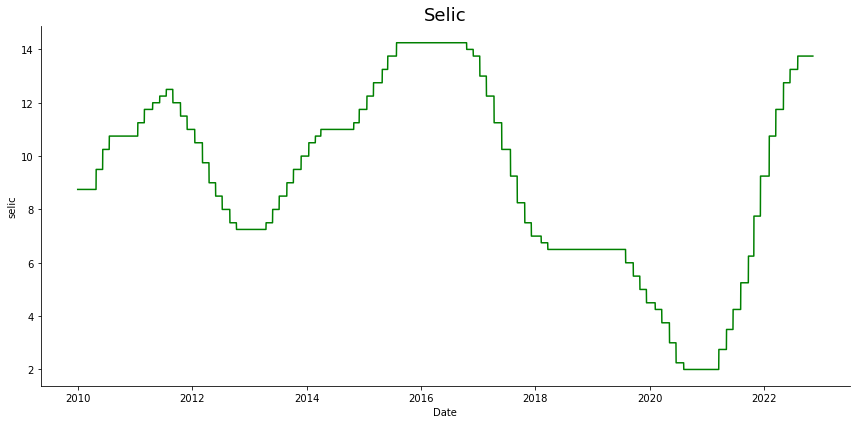

In [85]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.lineplot(data = selic, x = 'Date', y = 'selic', color = 'green')
ax.set_title('Selic', fontsize = 18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.tight_layout()
plt.show();

In [86]:
tjlp = sgs.get({'tjlp' : 256}, start = '2022-01-01')

In [87]:
tjlp = tjlp.reset_index()

In [88]:
tjlp.tail(6)

,Date,tjlp
5,2022-06-01,6.82
6,2022-07-01,7.01
7,2022-08-01,7.01
8,2022-09-01,7.01
9,2022-10-01,7.20
10,2022-11-01,7.20


#### Inflacao

In [89]:
inflacao = sgs.get({'ipca' : 433, 'igp-m' : 189, 'inpc' : 188}, start = '2010-01-01')

In [90]:
inflacao = inflacao.reset_index()

In [92]:
inflacao.tail(6)

,Date,ipca,igp-m,inpc
148,2022-05-01,0.47,0.52,0.45
149,2022-06-01,0.67,0.59,0.62
150,2022-07-01,-0.68,0.21,-0.60
151,2022-08-01,-0.36,-0.70,-0.31
152,2022-09-01,-0.29,-0.95,-0.32
153,2022-10-01,NaN,-0.97,NaN


In [63]:
def inflacao_ipca_anual(df_inflacao):
    inflacao_df = df_inflacao.copy()
    inflacao_df = inflacao_df.reset_index()
    inflacao_df = inflacao_df.dropna().tail(12)
    
    # acumulando IPCA
    inflacao_ipca = inflacao_df[['Date', 'ipca']]
    inflacao_ipca = inflacao_ipca.assign(ipca_indice = False)
    for i in inflacao_ipca.loc[1:, 'ipca_indice']:
        inflacao_ipca['ipca_indice'] = (inflacao_ipca['ipca'] / 100) + 1
    
    inflacao_ipca.iloc[0, -1] = 1
    inflacao_ipca['ipca_acumulado'] = np.cumprod(inflacao_ipca['ipca_indice'])
    
    inflacao_12meses_ipca = inflacao_ipca['ipca_acumulado'].tail(1).item()
    inflacao_12meses_ipca = round((inflacao_12meses_ipca - 1) * 100, 2)
    
    # acumulando IGP-M
    inflacao_igpm = inflacao_df[['Date', 'igp-m']]
    inflacao_igpm = inflacao_igpm.assign(igpm_indice = False)
    for i in inflacao_igpm.loc[1:, 'igpm_indice']:
        inflacao_igpm['igpm_indice'] = (inflacao_igpm['igp-m'] / 100) + 1
    
    inflacao_igpm.iloc[0, -1] = 1
    inflacao_igpm['igpm_acumulado'] = np.cumprod(inflacao_igpm['igpm_indice'])
    
    inflacao_12meses_igpm = inflacao_igpm['igpm_acumulado'].tail(1).item()
    inflacao_12meses_igpm = round((inflacao_12meses_igpm - 1) * 100, 2)
    
    # acumulando inpc
    inflacao_inpc = inflacao_df[['Date', 'inpc']]
    inflacao_inpc = inflacao_inpc.assign(inpc_indice = False)
    for i in inflacao_inpc.loc[1:, 'inpc_indice']:
        inflacao_inpc['inpc_indice'] = (inflacao_inpc['inpc'] / 100) + 1
    
    inflacao_inpc.iloc[0, -1] = 1
    inflacao_inpc['inpc_acumulado'] = np.cumprod(inflacao_inpc['inpc_indice'])
    
    inflacao_12meses_inpc = inflacao_inpc['inpc_acumulado'].tail(1).item()
    inflacao_12meses_inpc = round((inflacao_12meses_inpc - 1) * 100, 2)
    
    
    return inflacao_12meses_ipca, inflacao_12meses_igpm, inflacao_12meses_inpc

In [66]:
inflacao_ipca_anual(inflacao)[0]

5.85

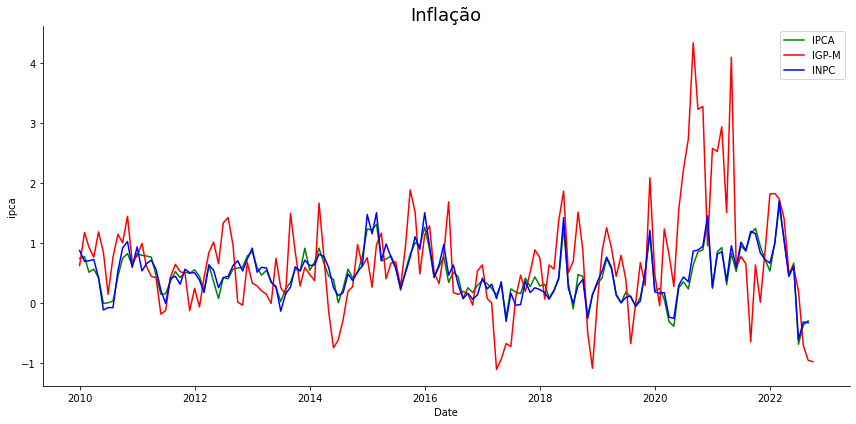

In [93]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.lineplot(data = inflacao, x = 'Date', y = 'ipca', color = 'green', label = 'IPCA')
sns.lineplot(data = inflacao, x = 'Date', y = 'igp-m', color = 'red', label = 'IGP-M')
sns.lineplot(data = inflacao, x = 'Date', y = 'inpc', color = 'blue', label = 'INPC')
ax.set_title('Inflação', fontsize = 18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.tight_layout()
plt.show();

#### PIB

In [94]:
pib = sgs.get({'ibcbr' : 24363}, start = '2019-01-01')

In [95]:
pib = pib.reset_index()

In [96]:
pib.tail(6)

,Date,ibcbr
38,2022-03-01,148.21
39,2022-04-01,142.10
40,2022-05-01,142.77
41,2022-06-01,141.93
42,2022-07-01,148.85
43,2022-08-01,149.01


#### Taxa de Desocupação (Desemprego) - PNADC

In [97]:
desemprego = sgs.get({'ibcbr' : 24369}, start = '2021-01-01')

In [98]:
desemprego = desemprego.reset_index()

In [99]:
desemprego.tail(6)

,Date,ibcbr
15,2022-04-01,10.5
16,2022-05-01,9.8
17,2022-06-01,9.3
18,2022-07-01,9.1
19,2022-08-01,8.9
20,2022-09-01,8.7


#### Moedas

In [157]:
# Um dia na frente por causa do python fazendo o range + 1
hoje = datetime.date.today()
inicio = hoje - datetime.timedelta(days = 7)
fim = hoje + datetime.timedelta(days = 1)
moedas_busca = 'USDBRL=X EURBRL=X GBPBRL=X'

In [172]:
# Pelo yfinance é mais recente
def obtendo_cambio(moedas, data_inicio, data_final):
    df = yf.download(moedas, start = data_inicio, end = data_final, progress = False)
    df = df[['Adj Close']].reset_index()
    df.columns = df.columns.droplevel(0)
    df = df.rename(columns = {'' :'Data'})
    dolar = round(df['USDBRL=X'].tail(1).item(), 2)
    euro = round(df['EURBRL=X'].tail(1).item(), 2)
    libra = round(df['GBPBRL=X'].tail(1).item(), 2)
    return dolar, euro, libra

In [173]:
obtendo_cambio(moedas_busca, inicio, fim)[0]

5.15

In [100]:
df_moedas = currency.get_currency_list()
df_moedas.head(4)

,code,name,symbol,country_code,country_name,type,exclusion_date
0,5,AFEGANE AFEGANIST,AFN,132,AFEGANISTAO ...,A,NaT
1,785,RANDE/AFRICA SUL,ZAR,7560,AFRICA DO SUL ...,A,NaT
2,490,LEK ALBANIA REP,ALL,175,"ALBANIA, REPUBLICA DA ...",A,NaT
3,610,MARCO ALEMAO,DEM,230,ALEMANHA ...,A,2002-01-02


In [112]:
hoje = datetime.date.today() + datetime.timedelta(days = 1)
hoje

datetime.date(2022, 11, 9)

In [ ]:
hoje = hoje + datetime.timedelta(days = 1)
hoje

In [126]:
moedas = currency.get(['USD', 'EUR', 'GBP'], start = '2022-01-01', end = '2022-11-09')

In [127]:
moedas = moedas.reset_index()

In [128]:
moedas

,Date,EUR,GBP,USD
0,2022-01-03,6.3595,7.5724,5.6309
1,2022-01-04,6.4219,7.6954,5.6776
2,2022-01-05,6.4210,7.6816,5.6628
3,2022-01-06,6.4435,7.7178,5.7042
4,2022-01-07,6.4415,7.7037,5.6753
...,...,...,...,...
208,2022-10-31,5.1976,6.0534,5.2570
209,2022-11-01,5.0851,5.9029,5.1500
210,2022-11-03,5.0122,5.7434,5.1349
211,2022-11-04,4.9841,5.6801,5.0360


In [116]:
round(moedas['USD'].tail(1), 2).item()

5.09

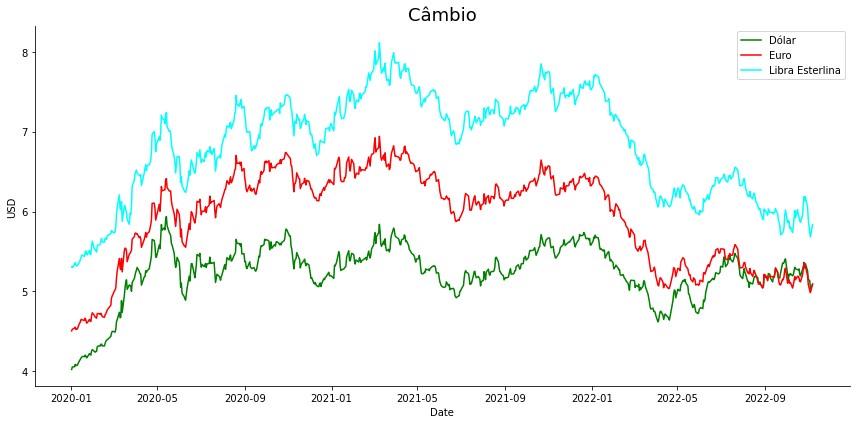

In [117]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.lineplot(data = moedas, x = 'Date', y = 'USD', color = 'green', label = 'Dólar')
sns.lineplot(data = moedas, x = 'Date', y = 'EUR', color = 'red', label = 'Euro')
sns.lineplot(data = moedas, x = 'Date', y = 'GBP', color = 'cyan', label = 'Libra Esterlina')
ax.set_title('Câmbio', fontsize = 18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.tight_layout()
plt.show();

#### Expectativas

ExpectativasMercadoTrimestrais:
- PIB Total
- PIB Agropecuária
- PIB Indústria
- PIB Serviços
- Taxa de desocupação
- IPCA
- Câmbio

ExpectativasMercadoTop5Mensais

In [10]:
expec = Expectativas()
expec.describe()

EntitySets:
  ExpectativasMercadoTop5Anuais
  ExpectativasMercadoInstituicoes
  ExpectativaMercadoMensais
  ExpectativasMercadoInflacao12Meses
  ExpectativasMercadoSelic
  ExpectativasMercadoTop5Selic
  ExpectativasMercadoTop5Mensais
  ExpectativasMercadoTrimestrais
  ExpectativasMercadoAnuais


##### Funcoes auxiliares

In [11]:
def obtendo_expectativas(indicador):
    ep = expec.get_endpoint('ExpectativasMercadoTrimestrais')
    df_ep = ep.query().filter(ep.Indicador == indicador).collect()
    df_ep = df_ep[df_ep['Data'] >= '2022']
    
    return df_ep

In [12]:
def unindo_prev(x):
    
    # Filtrando para previsoes dos ultimos 3 meses
    tres_meses = datetime.date.today() - datetime.timedelta(days = 90)
    tres_meses = tres_meses.strftime('%Y-%m-%d')
    
    # Selecionando trimestres
    trimestres = ['3/2022', '4/2022', '1/2023', '2/2023', '3/2023', '4/2023']
    
    # Calculando as metricas
    dicio_metricas = {}
    df_aux = x.copy()
    for trimestre in trimestres:
        df_aux = x[(x['DataReferencia'] == trimestre) & (x['Data'] > tres_meses)]
        dicio_metricas['media_{}'.format(trimestre)] = df_aux['Media'].mean()
        dicio_metricas['mediana_{}'.format(trimestre)] = df_aux['Mediana'].mean()
    
    # Colocando em um dataframe
    df = pd.DataFrame(list(dicio_metricas.items()))
    df.columns = ['metrica_trimestre', 'valor']
    df[['metrica', 'trimestres']] = df['metrica_trimestre'].str.split('_', 1, expand = True)
    df = df.drop(columns = 'metrica_trimestre')
    df = df[['trimestres', 'metrica', 'valor']]
    
    return df

#### Obtendo Expectativas do PIB

In [13]:
pib_total = obtendo_expectativas('PIB Total')
df_previsoes_pib = unindo_prev(pib_total)

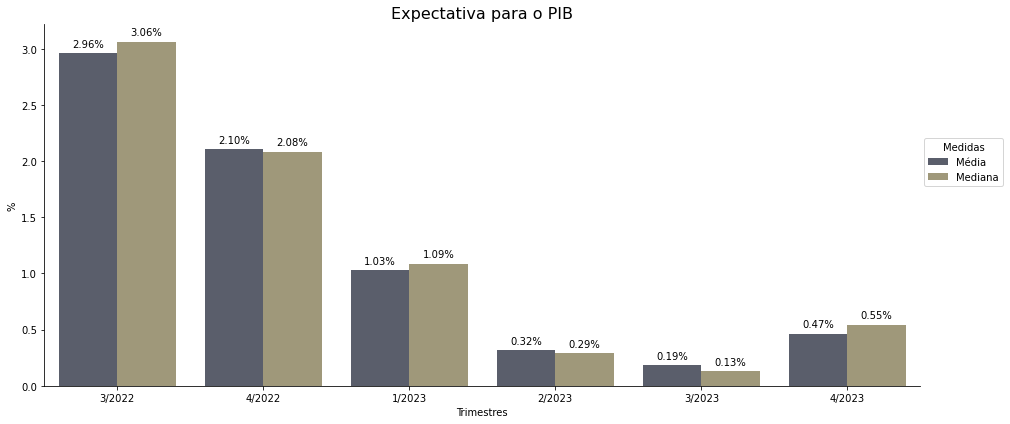

In [14]:
fig, ax = plt.subplots(figsize = (14, 6))

sns.barplot(data = df_previsoes_pib, x = 'trimestres', y = 'valor', hue = 'metrica', palette = 'cividis')
ax.set_title('Expectativa para o PIB', fontsize = 16)
handles, labels = ax.get_legend_handles_labels()
labels = ['Média', 'Mediana']
ax.set_xlabel('Trimestres')
ax.set_ylabel('%')
ax.legend(title = 'Medidas', handles = handles, labels = labels, bbox_to_anchor = [1.1, 0.7, 0, 0])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for container in ax.containers:
    ax.bar_label(container, fmt = '%.2f%%', padding = 4)

fig.tight_layout()
plt.show();

#### Obtendo dados de expectativa para o IPCA

In [15]:
previsao_ipca = obtendo_expectativas('IPCA')
df_previsoes_ipca = unindo_prev(previsao_ipca)

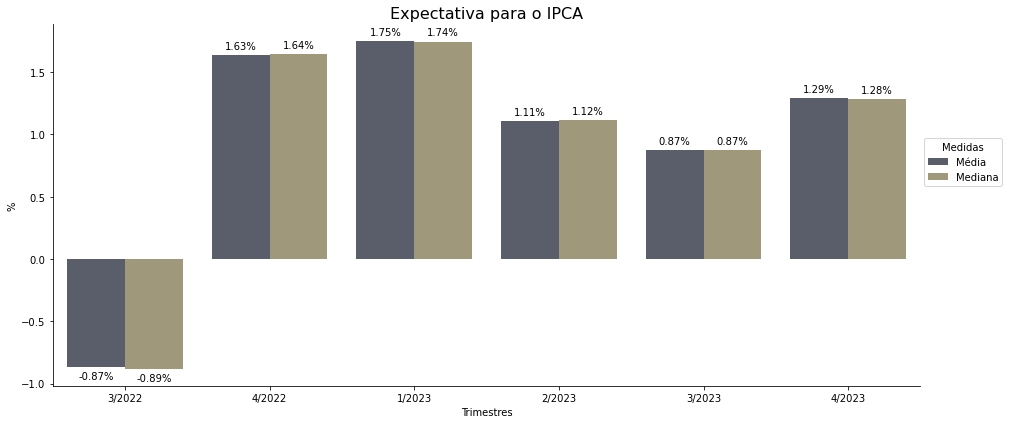

In [16]:
fig, ax = plt.subplots(figsize = (14, 6))

sns.barplot(data = df_previsoes_ipca, x = 'trimestres', y = 'valor', hue = 'metrica', palette = 'cividis')
ax.set_title('Expectativa para o IPCA', fontsize = 16)
handles, labels = ax.get_legend_handles_labels()
labels = ['Média', 'Mediana']
ax.set_xlabel('Trimestres')
ax.set_ylabel('%')
ax.legend(title = 'Medidas', handles = handles, labels = labels, bbox_to_anchor = [1.1, 0.7, 0, 0])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for container in ax.containers:
    ax.bar_label(container, fmt = '%.2f%%', padding = 4)

fig.tight_layout()
plt.show();

#### Obtendo expectativas para o cambio: Dolar

In [17]:
previsao_cambio = obtendo_expectativas('Câmbio')
df_previsoes_cambio = unindo_prev(previsao_cambio)

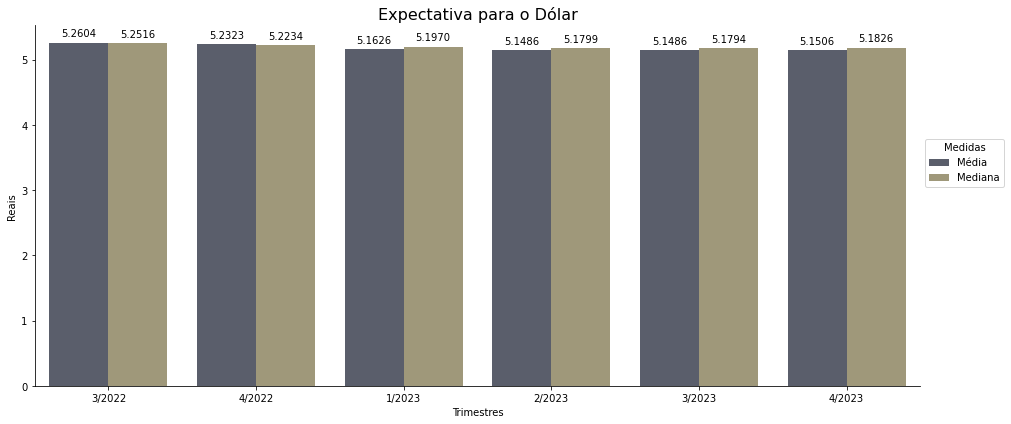

In [18]:
fig, ax = plt.subplots(figsize = (14, 6))

sns.barplot(data = df_previsoes_cambio, x = 'trimestres', y = 'valor', hue = 'metrica', palette = 'cividis')
ax.set_title('Expectativa para o Dólar', fontsize = 16)
handles, labels = ax.get_legend_handles_labels()
labels = ['Média', 'Mediana']
ax.set_xlabel('Trimestres')
ax.set_ylabel('Reais')
ax.legend(title = 'Medidas', handles = handles, labels = labels, bbox_to_anchor = [1.1, 0.7, 0, 0])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for container in ax.containers:
    ax.bar_label(container, fmt = '%.4f', padding = 4)
    
fig.tight_layout()
plt.show();

#### Obtendo expectativas para o cambio: Taxa de Desocupação

In [31]:
previsao_desocupacao = obtendo_expectativas('Taxa de desocupação')
df_previsoes_desocupacao = unindo_prev(previsao_desocupacao)

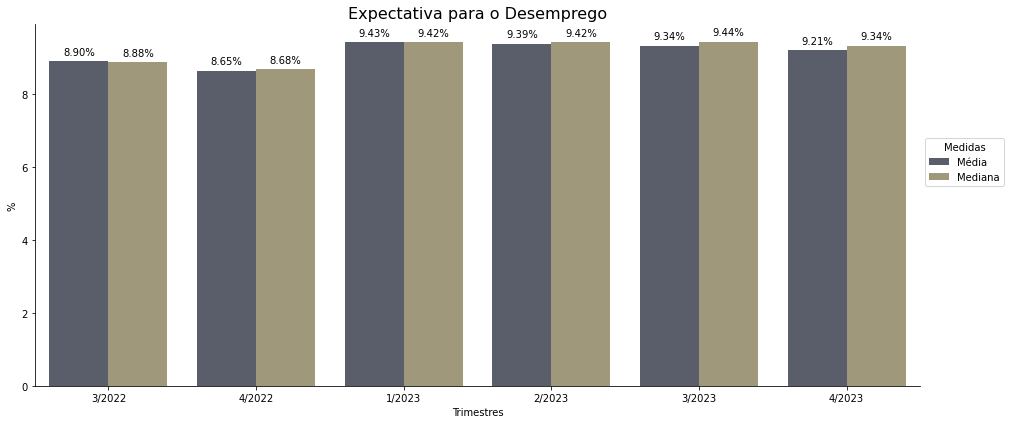

In [36]:
fig, ax = plt.subplots(figsize = (14, 6))

sns.barplot(data = df_previsoes_desocupacao, x = 'trimestres', y = 'valor', hue = 'metrica', palette = 'cividis')
ax.set_title('Expectativa para o Desemprego', fontsize = 16)
handles, labels = ax.get_legend_handles_labels()
labels = ['Média', 'Mediana']
ax.set_xlabel('Trimestres')
ax.set_ylabel('%')
ax.legend(title = 'Medidas', handles = handles, labels = labels, bbox_to_anchor = [1.1, 0.7, 0, 0])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for container in ax.containers:
    ax.bar_label(container, fmt = '%.2f%%', padding = 4)
    
fig.tight_layout()
plt.show();